In [1]:
# Скачиваем файл с примерами

!wget https://lodmedia.hb.bizmrg.com/cases/790927/BEAR%20CASE%20DATA.zip

--2021-07-01 17:54:50--  https://lodmedia.hb.bizmrg.com/cases/790927/BEAR%20CASE%20DATA.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233761071 (223M) [application/zip]
Saving to: ‘BEAR CASE DATA.zip’

BEAR CASE DATA.zip  100%[===================>] 222.93M  9.70MB/s    in 27s     

2021-07-01 17:55:19 (8.35 MB/s) - ‘BEAR CASE DATA.zip’ saved [233761071/233761071]



In [2]:
# Распаковываем в папку

!unzip "BEAR CASE DATA.zip" 

Archive:  BEAR CASE DATA.zip
  inflating: TEST IMAGES/withBears/2016-04-26 11-24-29_0142_1L.JPG  
  inflating: TEST IMAGES/withBears/_2016-05-12 14-20-10_2145_2R.JPG  
  inflating: TEST IMAGES/withBears/2016-05-12 12-24-40_0910_2R.JPG  
  inflating: TEST IMAGES/withBears/_2016-05-12 11-30-07_0102_2R.JPG  
  inflating: TEST IMAGES/withBears/_2016-04-25 13-50-46_1257_R.JPG  
  inflating: TEST IMAGES/withBears/_2016-04-25 11-06-03_2568_L.JPG  
  inflating: TEST IMAGES/withBears/2016-05-18 11-43-50_1486_1L.JPG  
  inflating: TEST IMAGES/withBears/2016-04-25 15-08-38_2037_R.JPG  
  inflating: TEST IMAGES/withBears/2016-05-18 12-39-15_2042_r_3C.JPG  
  inflating: TEST IMAGES/withBears/_2016-04-26 13-04-55_1101_r_3C.JPG  
  inflating: TEST IMAGES/withBears/2016-04-25 14-21-36_0652_L.JPG  
  inflating: TEST IMAGES/withBears/2016-05-13 10-16-57_0024_1L.JPG  
  inflating: TEST IMAGES/withBears/2016-04-25 14-09-54_2051_r_C.JPG  
  inflating: TEST IMAGES/withBears/2016-05-12 11-44-33_0338_2R.JPG  

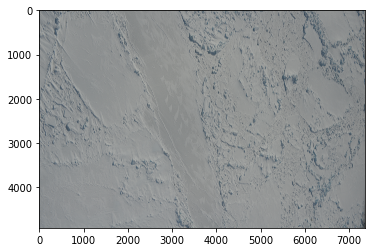

In [17]:
#подключаем необходимые библиотеки
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("TEST IMAGES/withBears/2016-05-13 11-33-21_0855_2R.JPG")


img_RGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

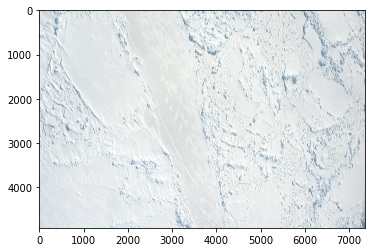

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
contrast = 1.25
brightness = 50
img[:,:,2] = np.clip(contrast * img[:,:,2] + brightness, 0, 255)
img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
img_RGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

In [19]:
#Ищем медведя по цветовой маске

img_hsv = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
#цвет медведя, но это не точно 
# цвета в HSV!!!!!
light_orange = (60, 5, 170)
dark_orange = (64, 15, 180)
mask = cv2.inRange(img_hsv, light_orange, dark_orange)
mask.max()

255

In [20]:
#находим точку на картинке которая максимально похоже по цвету на медведя

position = np.unravel_index(np.argmax(mask), mask.shape)
position

(1074, 4087)

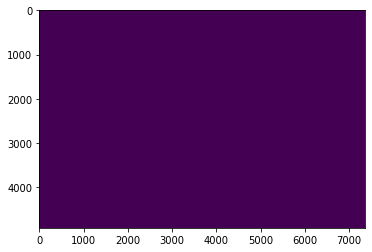

In [21]:

plt.imshow(mask)
plt.show()

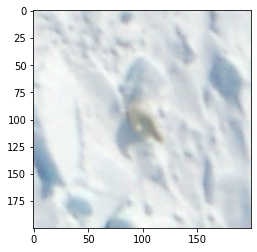

In [22]:
#так выглядит медведь, но его еще надо найти 
crop = img_RGB[ 4726-100:4726+100,6157-100:6157+100]
plt.imshow(crop)
plt.show()

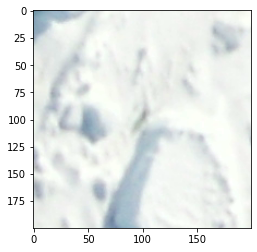

In [23]:
#вырeзаем картинку чтобы посмотреть
y=position[0]-100
x=position[1]-100
h=200
w=200
crop = img_RGB[y:y+h, x:x+w]
plt.imshow(crop)
plt.show()

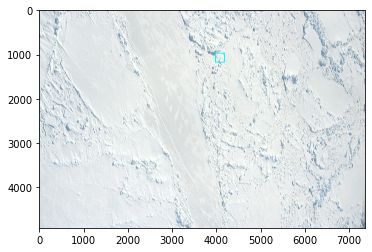

In [24]:
# выделяем медведя на общей картинке
cv2.rectangle(img_RGB, (x,y), (x+w,y+h), (0, 255, 255), 20)
plt.imshow(img_RGB)
plt.show()